In [2]:
# Importar librerías
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [3]:
# 1. Leer datos
datos = pd.read_csv("../MyPython//CardiologyMixed.csv", sep=";")
print(datos.head())

   age gender  chest pain type  blood pressure  cholesterol  \
0   60   Male     Asymptomatic             130          206   
1   49   Male  Abnormal Angina             130          266   
2   64   Male           Angina             110          211   
3   63   Male     Asymptomatic             130          254   
4   53   Male     Asymptomatic             140          203   

  Fasting blood sugar <120 resting ecg  maximum heart rate     angina peak  \
0                    FALSO         Hyp                 132  VERDADERO  2,4   
1                    FALSO      Normal                 171      FALSO  0,6   
2                    FALSO         Hyp                 144  VERDADERO  1,8   
3                    FALSO         Hyp                 147      FALSO  1,4   
4                VERDADERO         Hyp                 155  VERDADERO  3,1   

  slope  #colored vessels    thal    class  
0  Flat                 2     Rev     Sick  
1    Up                 0  Normal  Healthy  
2  Flat          

In [8]:
# 2. Renombrar columnas a nombres más fáciles
datos = datos.rename(columns={
    'age': 'Edad',
    'gender': 'Genero',
    'chest pain type': 'Tipo_Dolor_Pecho',
    'blood pressure': 'Presion_Arterial',
    'cholesterol': 'Colesterol',
    'Fasting blood sugar <120': 'Azucar_Ayunas',
    'resting ecg': 'ECG_Reposo',
    'maximum heart rate': 'Frecuencia_Max',
    'angina': 'Angina',
    'peak': 'Pico',
    'slope': 'Pendiente',
    '#colored vessels': 'Vasos_Coloreados',
    'thal': 'Thal',
    'class': 'Diagnostico'
})

print(datos.head())

   Edad Genero Tipo_Dolor_Pecho  Presion_Arterial  Colesterol Azucar_Ayunas  \
0    60   Male     Asymptomatic               130         206         FALSO   
1    49   Male  Abnormal Angina               130         266         FALSO   
2    64   Male           Angina               110         211         FALSO   
3    63   Male     Asymptomatic               130         254         FALSO   
4    53   Male     Asymptomatic               140         203     VERDADERO   

  ECG_Reposo  Frecuencia_Max     Angina Pico Pendiente  Vasos_Coloreados  \
0        Hyp             132  VERDADERO  2,4      Flat                 2   
1     Normal             171      FALSO  0,6        Up                 0   
2        Hyp             144  VERDADERO  1,8      Flat                 0   
3        Hyp             147      FALSO  1,4      Flat                 1   
4        Hyp             155  VERDADERO  3,1      Down                 0   

     Thal Diagnostico  
0     Rev        Sick  
1  Normal     Health

In [9]:
# 3. Mapear variables categóricas a numéricas
datos['Genero'] = datos['Genero'].map({'Male': 1, 'Female': 0})
datos['Azucar_Ayunas'] = datos['Azucar_Ayunas'].map({'VERDADERO': 1, 'FALSO': 0})
datos['Angina'] = datos['Angina'].map({'VERDADERO': 1, 'FALSO': 0})

datos['Tipo_Dolor_Pecho'] = datos['Tipo_Dolor_Pecho'].map({
    'Asymptomatic': 0,
    'Abnormal Angina': 1,
    'Angina': 2,
    'NoTang': 3
})

datos['ECG_Reposo'] = datos['ECG_Reposo'].map({'Hyp': 0, 'Normal': 1})
datos['Pendiente'] = datos['Pendiente'].map({'Up': 0, 'Flat': 1, 'Down': 2})
datos['Thal'] = datos['Thal'].map({'Normal': 0, 'Rev': 1})

datos['Diagnostico'] = datos['Diagnostico'].map({'Healthy': 0, 'Sick': 1})

# 🔧 Corregir la columna "Pico" (comas a punto y float)
datos['Pico'] = datos['Pico'].astype(str).str.replace(',', '.').astype(float)

print(datos.dtypes)  # ahora "Pico" debe aparecer como float


Edad                  int64
Genero                int64
Tipo_Dolor_Pecho    float64
Presion_Arterial      int64
Colesterol            int64
Azucar_Ayunas         int64
ECG_Reposo          float64
Frecuencia_Max        int64
Angina                int64
Pico                float64
Pendiente             int64
Vasos_Coloreados      int64
Thal                float64
Diagnostico           int64
dtype: object


In [10]:
# 4. Variables independientes y dependiente
var_independientes = datos.columns[:-1].to_list()
x = datos[var_independientes].values
y = datos['Diagnostico']

In [11]:
# 5. Entrenar el modelo
clasificar = DecisionTreeClassifier(random_state=42)
clasificar.fit(x, y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [12]:
# 6. Predicción de ejemplo (paciente ficticio)
ejemplo = [[60, 1, 0, 130, 250, 0, 0, 150, 1, 2.0, 0, 1, 0]]
print("Predicción:", clasificar.predict(ejemplo))

Predicción: [0]


In [13]:
# 7. Reglas del árbol
reglas_arbol = tree.export_text(
    clasificar,
    feature_names=var_independientes,
    class_names=['Healthy', 'Sick'],
    show_weights=True,
    decimals=0
)
print(reglas_arbol)

|--- Thal <= 0
|   |--- Vasos_Coloreados <= 0
|   |   |--- Pico <= 3
|   |   |   |--- Edad <= 58
|   |   |   |   |--- Presion_Arterial <= 109
|   |   |   |   |   |--- Genero <= 0
|   |   |   |   |   |   |--- weights: [5, 0] class: Healthy
|   |   |   |   |   |--- Genero >  0
|   |   |   |   |   |   |--- Pendiente <= 0
|   |   |   |   |   |   |   |--- weights: [0, 1] class: Sick
|   |   |   |   |   |   |--- Pendiente >  0
|   |   |   |   |   |   |   |--- weights: [1, 0] class: Healthy
|   |   |   |   |--- Presion_Arterial >  109
|   |   |   |   |   |--- weights: [73, 0] class: Healthy
|   |   |   |--- Edad >  58
|   |   |   |   |--- Frecuencia_Max <= 84
|   |   |   |   |   |--- weights: [0, 1] class: Sick
|   |   |   |   |--- Frecuencia_Max >  84
|   |   |   |   |   |--- Colesterol <= 244
|   |   |   |   |   |   |--- Angina <= 0
|   |   |   |   |   |   |   |--- weights: [11, 0] class: Healthy
|   |   |   |   |   |   |--- Angina >  0
|   |   |   |   |   |   |   |--- Genero <= 0
|   |   |

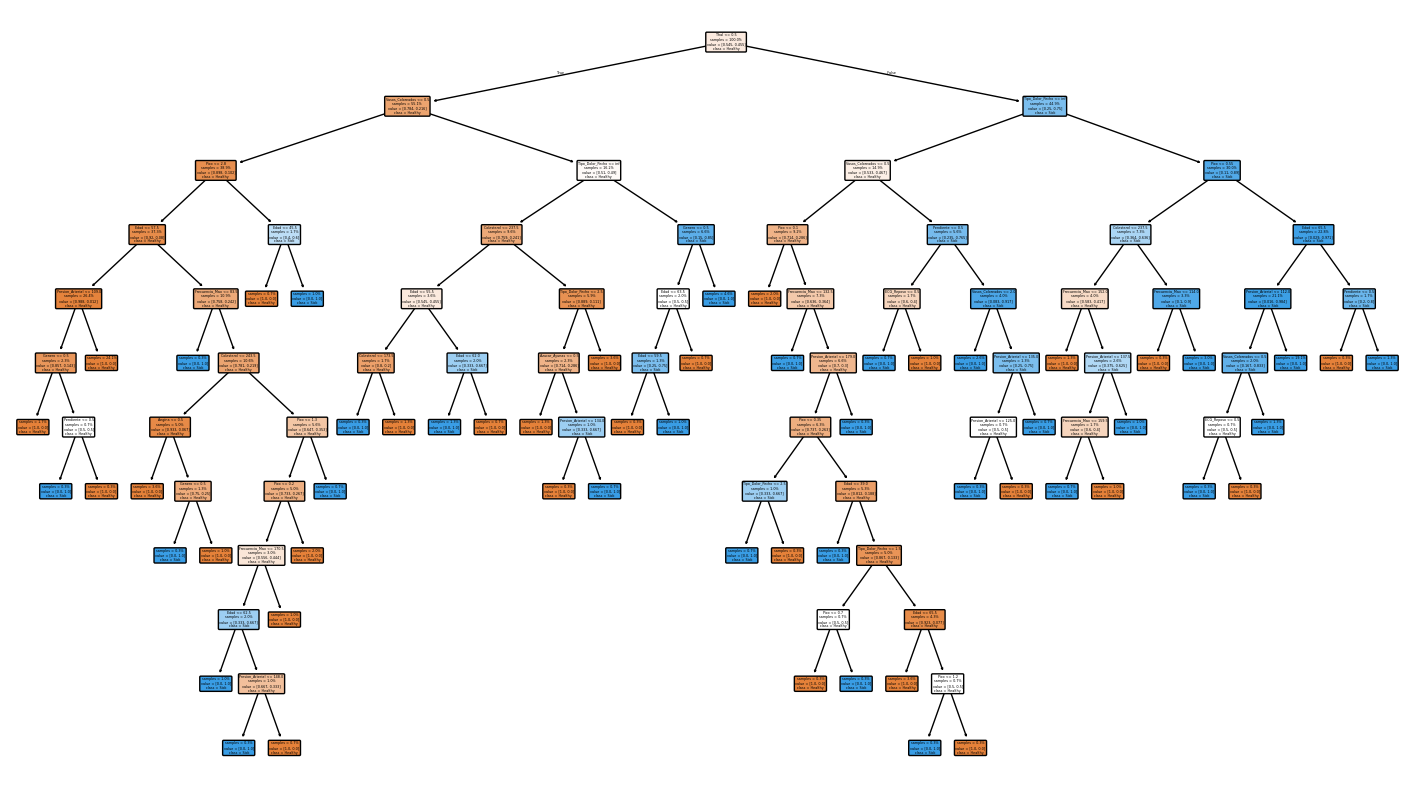

In [14]:
# 8. Graficar el árbol
plt.figure(figsize=(18,10))
tree.plot_tree(
    clasificar,
    feature_names=var_independientes,
    class_names=['Healthy', 'Sick'],
    filled=True,
    impurity=False,
    proportion=True,
    rounded=True
)
plt.show()